# Module 3- Regression & Beta Calculation



   ### Welcome to the Answer notebook for Module 3 ! 
Make sure that you've submitted the module 2 notebook and unlocked Module 3 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gold = pd.read_csv('GOLD.csv')

In [3]:
gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.0,919.376358


In [4]:
gold['Pred'].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
482     True
483     True
484     True
485     True
486     True
487     True
488     True
489     True
490     True
491     True
492     True
493     True
494     True
495     True
496     True
497     True
498     True
499     True
500     True
501     True
502     True
503     True
504     True
505     True
506     True
507     True
508     True
509     True
510     True
511     True
Name: Pred, Length: 512, dtype: bool

In [5]:
gold['new'].isnull().values.any()

False

In [6]:
index = []
for i in range(0, len(gold['Pred'])):
    if(gold['Pred'].isnull()[i] == True):
        index.append(i)

In [7]:
print(index)

[411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511]


In [8]:
print(len(index))

101


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
regressor = LinearRegression()

In [11]:
X = gold.iloc[:, 1].values[:411]
X = X.reshape(-1,1)

In [12]:
y_p = gold.iloc[:, 7].values[:411]
y_p = y_p.reshape(-1,1)

In [13]:
regressor.fit(X, y_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred = regressor.predict(gold.iloc[:, 1].values[411:].reshape(-1,1))

In [15]:
y_pred

array([[362.23117008],
       [360.19797346],
       [357.88056656],
       [358.13198335],
       [358.83157789],
       [354.17490176],
       [354.8744963 ],
       [355.74898947],
       [354.73239116],
       [357.45425114],
       [358.41619363],
       [360.03400599],
       [358.88623371],
       [358.70040391],
       [359.4765166 ],
       [363.56477216],
       [363.61942798],
       [360.77732518],
       [360.48218374],
       [361.40040157],
       [364.20971087],
       [362.95262694],
       [363.45546051],
       [365.70728042],
       [366.13359584],
       [367.2595058 ],
       [367.05181367],
       [365.25910267],
       [364.71254444],
       [365.96962837],
       [365.76193624],
       [364.46112766],
       [367.99189382],
       [370.14533325],
       [374.02589669],
       [374.15707066],
       [376.31051009],
       [379.64451529],
       [380.19107352],
       [379.38216734],
       [377.64411217],
       [375.82953885],
       [376.5837892 ],
       [374

In [16]:
y_pred = y_pred.reshape(101)

In [17]:
gold['Pred'][411:] = y_pred

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.000000,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.000000,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.000000,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.000000,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.000000,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.000000,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.000000,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.000000,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.000000,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.000000,919.376358


In [19]:
X = gold.iloc[:, 1].values
X = X.reshape(-1,1)

In [20]:
y_p = gold.iloc[:, 7].values
y_p = y_p.reshape(-1,1)

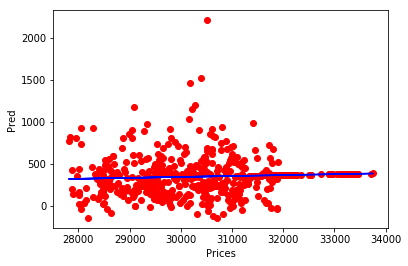

In [21]:
plt.scatter(X, y_p, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel('Prices')
plt.ylabel('Pred')
plt.show()

In [22]:
X = gold.iloc[:, 1].values
X = X.reshape(-1,1)

In [23]:
y_n = gold.iloc[:, 8].values
y_n = y_n.reshape(-1,1)

In [24]:
regressor.fit(X, y_n)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

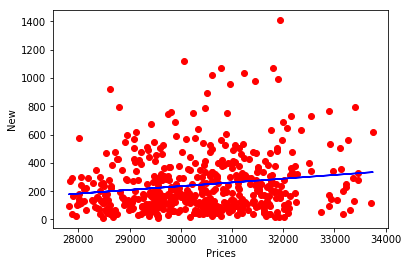

In [25]:
plt.scatter(X, y_n, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel('Prices')
plt.ylabel('New')
plt.show()

The 'Pred' column is a linear function of the prices, while the 'New' column is a polynomial function of the prices.

### Query 3.2 
3.2 Import the stock of your choosing AND the Nifty index. <br>
Using linear regression (OLS), calculate -<br>

>The daily Beta value for the past 3 months. (Daily= Daily returns)<br>

>The monthly Beta value. (Monthly= Monthly returns)<br>

Refrain from using the (covariance(x,y)/variance(x)) formula.<br> 
Attempt the question using regression.(Regression Reference) <br>
Were the Beta values more or less than 1 ? What if it was negative ?<br> 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [26]:
nifty = pd.read_csv('Nifty50.csv')

In [27]:
nifty

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
5,22-May-2017,9480.25,9498.65,9427.90,9438.25,202874757,9432.97
6,23-May-2017,9445.05,9448.05,9370.00,9386.15,231345629,11553.27
7,24-May-2017,9410.90,9431.90,9341.65,9360.55,218265181,11045.95
8,25-May-2017,9384.05,9523.30,9379.20,9509.75,298147347,16964.26
9,26-May-2017,9507.75,9604.90,9495.40,9595.10,225647631,11204.36


In [28]:
axis = pd.read_csv('AXISBANK.csv')
axis = axis.groupby('Series').get_group('EQ')
axis = axis.reset_index(drop = True)

In [29]:
axis

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AXISBANK,EQ,15-May-2017,503.00,505.00,508.50,498.40,500.25,500.10,502.95,8806756,4.429384e+09,109965,4320438,49.06
1,AXISBANK,EQ,16-May-2017,500.10,502.10,504.50,493.50,502.05,501.50,499.85,8610492,4.303938e+09,101028,4027982,46.78
2,AXISBANK,EQ,17-May-2017,501.50,501.35,506.75,498.50,502.00,502.80,502.88,6443135,3.240154e+09,84189,2876528,44.64
3,AXISBANK,EQ,18-May-2017,502.80,498.00,499.10,490.25,492.85,492.00,494.96,9227022,4.566993e+09,95624,5348691,57.97
4,AXISBANK,EQ,19-May-2017,492.00,495.75,503.85,494.20,501.90,501.70,499.10,7611430,3.798900e+09,72985,4190505,55.06
5,AXISBANK,EQ,22-May-2017,501.70,504.00,507.45,499.50,502.00,502.30,503.00,4970982,2.500383e+09,62027,2665857,53.63
6,AXISBANK,EQ,23-May-2017,502.30,502.25,506.10,495.20,500.50,500.60,500.17,7549551,3.776028e+09,69512,4120666,54.58
7,AXISBANK,EQ,24-May-2017,500.60,503.00,505.00,495.00,499.65,499.30,498.39,7271148,3.623902e+09,61592,4986725,68.58
8,AXISBANK,EQ,25-May-2017,499.30,502.00,509.90,495.85,507.85,507.45,504.39,9157557,4.619023e+09,106201,4220728,46.09
9,AXISBANK,EQ,26-May-2017,507.45,508.00,513.00,505.00,510.50,511.45,508.86,5995136,3.050683e+09,72779,2824290,47.11


In [30]:
closing = pd.DataFrame()

In [31]:
closing['AXISBANK'] = axis['Close Price']
closing['NIFTY'] = nifty['Close']

In [32]:
closing

,AXISBANK,NIFTY
0,500.10,9445.40
1,501.50,9512.25
2,502.80,9525.75
3,492.00,9429.45
4,501.70,9427.90
5,502.30,9438.25
6,500.60,9386.15
7,499.30,9360.55
8,507.45,9509.75
9,511.45,9595.10


In [33]:
closing = closing.set_index(axis['Date'])

In [34]:
closing

,AXISBANK,NIFTY
Date,,
15-May-2017,500.10,9445.40
16-May-2017,501.50,9512.25
17-May-2017,502.80,9525.75
18-May-2017,492.00,9429.45
19-May-2017,501.70,9427.90
22-May-2017,502.30,9438.25
23-May-2017,500.60,9386.15
24-May-2017,499.30,9360.55
25-May-2017,507.45,9509.75


In [35]:
pct = closing.pct_change(1) * 100 # Percentage change for one day
pct = pct.dropna()

In [36]:
pct

,AXISBANK,NIFTY
Date,,
16-May-2017,0.279944,0.707752
17-May-2017,0.259222,0.141922
18-May-2017,-2.147971,-1.010944
19-May-2017,1.971545,-0.016438
22-May-2017,0.119593,0.109781
23-May-2017,-0.338443,-0.552009
24-May-2017,-0.259688,-0.272742
25-May-2017,1.632285,1.593923
26-May-2017,0.788255,0.897500


In [37]:
# Since Saturdays and Sundays are holidays, I am taking the number of days over the past 3 months as 75

In [38]:
X = pct.iloc[(len(pct['NIFTY']) - 75):, 0].values
y = pct.iloc[(len(pct['NIFTY']) - 75):, 1].values

In [39]:
import statsmodels.api as sm

In [40]:
X1 = sm.add_constant(X)

In [41]:
model = sm.OLS(y, X1)

In [42]:
results = model.fit()

In [43]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     23.99
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           5.65e-06
Time:                        19:39:30   Log-Likelihood:                -68.469
No. Observations:                  75   AIC:                             140.9
Df Residuals:                      73   BIC:                             145.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0032      0.071     -0.045      0.9

The daily Beta value for the past 3 months is 0.2512 <br>

In [44]:
pct = closing.pct_change(25) * 100 # Percentage change for every month (Since Saturdays and Sundays are holidays, I am taking 30 days as 25 days)
pct = pct.dropna()

In [45]:
pct

,AXISBANK,NIFTY
Date,,
19-Jun-2017,4.009198,2.246067
20-Jun-2017,2.063809,1.484927
21-Jun-2017,0.984487,1.132194
22-Jun-2017,3.252033,2.126847
23-Jun-2017,0.588001,1.559732
27-Jun-2017,-1.881346,0.775038
28-Jun-2017,-1.717938,1.119735
29-Jun-2017,2.563589,1.533564
30-Jun-2017,1.950931,0.117248


In [46]:
X = pct.iloc[:, 0].values
y = pct.iloc[:, 1].values

In [47]:
X1 = sm.add_constant(X)

In [48]:
model = sm.OLS(y, X1)

In [49]:
results = model.fit()

In [50]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     353.8
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           3.62e-59
Time:                        19:39:40   Log-Likelihood:                -1158.6
No. Observations:                 469   AIC:                             2321.
Df Residuals:                     467   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3080      0.139      2.215      0.0

The monthly Beta value is 0.3314 <br>

The daily Beta and the monthly Beta values are less than one, which shows that the stock moves less than the market and it poses lesser risks but lower returns.